# Sélection des hyper-paramètres

Le modèle des plus proches voisins [KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) est paramétrable. Le nombre de voisons est variables, la prédiction peut dépendre du plus proche voisins ou des $k$ plus proches proches. Comment choisir $k$ ? 

In [1]:
%matplotlib inline

In [2]:
from papierstat.datasets import load_wines_dataset
df = load_wines_dataset()

In [3]:
import numpy.random as rnd
index = list(df.index)
rnd.shuffle(index)
df_alea = df.iloc[index, :].reset_index(drop=True)
X = df_alea.drop(['quality', 'color'], axis=1)
y = df_alea['quality']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

On fait une boucle sur un paramètre.

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
voisins = []
r2s = []
for n in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    r2 = r2_score(y_test, knn.predict(X_test))
    voisins.append(n)
    r2s.append(r2)

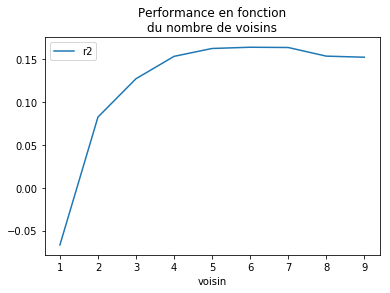

In [6]:
import pandas
df = pandas.DataFrame(dict(voisin=voisins, r2=r2s))
ax = df.plot(x='voisin', y='r2')
ax.set_title("Performance en fonction\ndu nombre de voisins");

La fonction [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) automatise la recherche d'un optimum parmi les hyperparamètre, elle utilise notamment la validation croisée. On teste toutes les valeurs de $k$ de 1 à 20.

In [7]:
parameters = {'n_neighbors': list(range(1,31))}

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, parameters, verbose=2, return_train_score=True)

In [9]:
grid.fit(X, y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .

[CV] ................................... n_neighbors=21, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ................................... n_neighbors=22, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ................................... n_neighbors=22, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ................................... n_neighbors=22, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ................................... n_neighbors=23, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ................................... n_neighbors=23, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ................................... n_neighbors=23, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   13.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

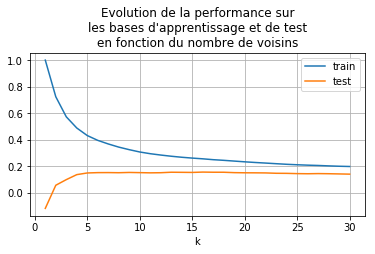

In [10]:
res = grid.cv_results_
k = res['param_n_neighbors']
train_score = res['mean_train_score']
test_score = res['mean_test_score']

import pandas
df_score = pandas.DataFrame(dict(k=k, test=test_score, train=train_score))
ax = df_score.plot(x='k', y='train', figsize=(3, 3))
df_score.plot(x='k', y='test', figsize=(6, 3), ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins");

On voit que le modèle gagne en pertinence sur la base de test et que le nombre de voisins optimal parmi ceux essayés se situe autour de 15.

In [11]:
df_score[12:17]

,k,test,train
12,13,0.155276,0.275789
13,14,0.154595,0.268146
14,15,0.153811,0.261854
15,16,0.156367,0.256344
16,17,0.155252,0.249811


L'erreur sur la base d'apprentissage augmente de manière sensible ($R^2$ baisse). Voyons ce qu'il en est un peu plus loin.

In [12]:
parameters = {'n_neighbors': list(range(5, 51, 5)) + list(range(50, 201, 20))}
grid = GridSearchCV(knn, parameters, verbose=2, return_train_score=True)
grid.fit(X, y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ................................... n_neighbors=15, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ................................... n_neighbors=15, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ................................... n_neighbors=15, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   16.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 50, 70, 90, 110, 130, 150, 170, 190]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

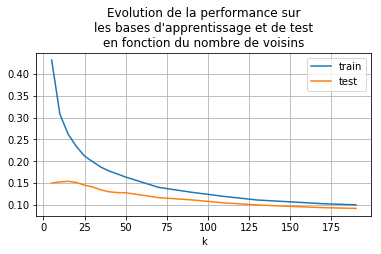

In [13]:
res = grid.cv_results_
k = res['param_n_neighbors']
train_score = res['mean_train_score']
test_score = res['mean_test_score']

import pandas
df_score = pandas.DataFrame(dict(k=k, test=test_score, train=train_score))
ax = df_score.plot(x='k', y='train', figsize=(3, 3))
df_score.plot(x='k', y='test', figsize=(6, 3), ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins");

Après 25 voisins, la pertinence du modèle décroît fortement.